LinearRegression Accuracy: 96.0 %
TweedieRegressor Accuracy: 69.2 %
Lasso Accuracy: 96.0 %
SGDRegressor Accuracy: 95.9 %
ElasticNet Accuracy: 85.9 %
Lars Accuracy: 96.0 %


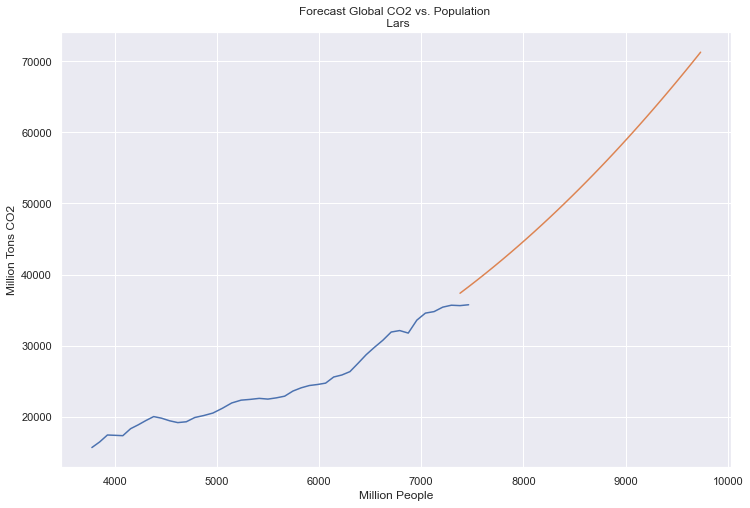

In [14]:
'''Set up'''
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, TweedieRegressor, Lasso, SGDRegressor, ElasticNet, Lars

'''Data'''
with open(r'data\CO2_vs_population.csv', 'r') as f:
    df = pd.read_csv(f, encoding='utf-8')
    df.columns = ['Year', 'CO2 (tons)', 'Pop', 'MT CO2', 'Million people']

with open(r'data\pop_forecast.csv', 'r') as f:
    forecast_pop = pd.read_csv(f, encoding='utf-8')
    forecast_pop['Total population'] = forecast_pop['Total population'] / 1e6
    forecast_pop = forecast_pop['Total population'].to_numpy()

x = df['Million people'].to_numpy().reshape(-1,1)
y = df['MT CO2'].to_numpy()

'''ML Model'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=8)

for model in [LinearRegression, TweedieRegressor, Lasso, SGDRegressor, ElasticNet, Lars]:
    pipeline = Pipeline(
        [
            ('scalar', StandardScaler()),
            ('poly feature', PolynomialFeatures(2)),
            ('linear regression', model()),
        ])

    pipeline.fit(x_train, y_train)
    print('{} Accuracy:'.format(model.__name__), round(100 * pipeline.score(x_test, y_test), 1), '%')

# Forecast on last model
pred_co2 = pipeline.predict(forecast_pop.reshape(-1,1))

# Chart
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
ax.plot(df['Million people'], df['MT CO2'])
ax.plot(forecast_pop, pred_co2)

ax.set_xlabel('Million People')
ax.set_ylabel('Million Tons CO2')
ax.set_title(f'Forecast Global CO2 vs. Population \n {model.__name__}')

plt.show();